In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Collecting pandas
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/22/a5/a0b255295406ed54269814bc93723cfd1a0da63fb9aaf99e1364f07923e5/pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.26.0 from https://files.pythonhosted.org/packages/16/2e/86f24451c2d530c88daf997cb8d6ac622c1d40d19f5a031ed68a4b73a374/numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------------------- ------ 51.2/61.0 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 819.4 kB/s eta 0:00:00
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bcab2cdc73f02bb7ba91ada0/tzdata-2024.1-py2.py3-none-

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python312\\Scripts\\f2py.exe' -> 'c:\\Python312\\Scripts\\f2py.exe.deleteme'


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [60]:
df = pd.read_csv("C:/Users/nithi/Downloads/framingham.csv")
df.dropna(axis=0, inplace=True)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [201]:
X = df[['age', 'male', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP']]
Y = df['TenYearCHD']

In [202]:
X.head()

,age,male,cigsPerDay,totChol,sysBP,diaBP
0,39,1,0.0,195.0,106.0,70.0
1,46,0,0.0,250.0,121.0,81.0
2,48,1,20.0,245.0,127.5,80.0
3,61,0,30.0,225.0,150.0,95.0
4,46,0,23.0,285.0,130.0,84.0


In [203]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

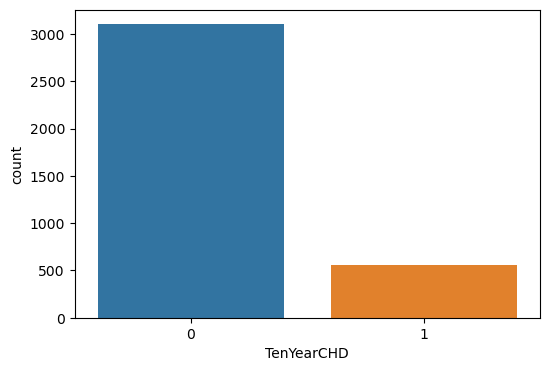

In [206]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'TenYearCHD', data=df)
plt.show()

<Axes: >

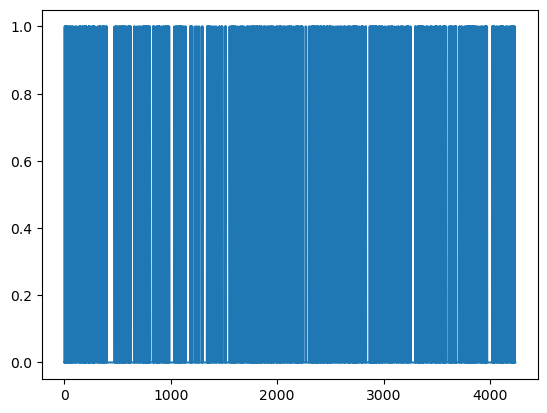

In [207]:
Y.plot()

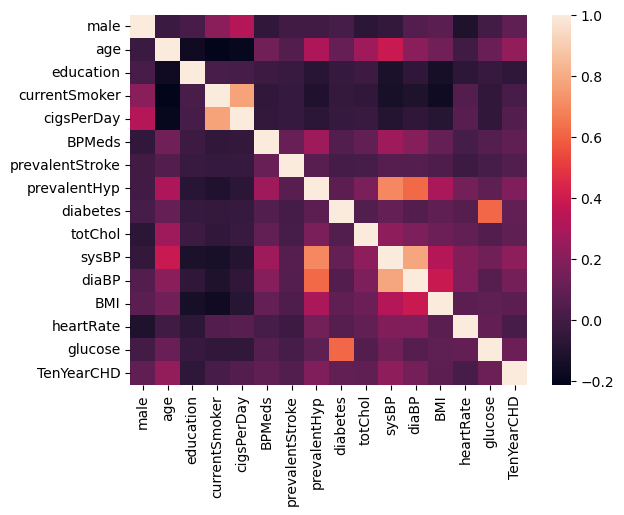

In [208]:
import seaborn as sns
sns.heatmap(df.corr())
plt.show()

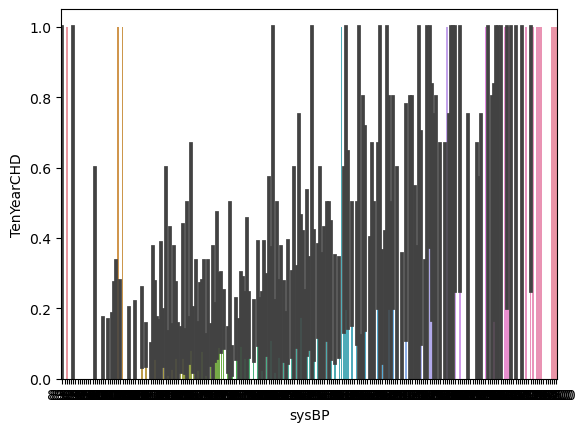

In [209]:
sns.barplot(x='sysBP', y='TenYearCHD', data=df)
plt.show()

# LINEAR REGRESSION

In [210]:
X = df['sysBP'].values.reshape(-1, 1)
Y = df['TenYearCHD'].values
X

array([[106. ],
       [121. ],
       [127.5],
       ...,
       [133.5],
       [141. ],
       [133. ]])

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [212]:
y_predict = lr.predict(X_test)
y_predict

array([0.31078965, 0.22904708, 0.28106508, ..., 0.14358893, 0.12872665,
       0.03955293])

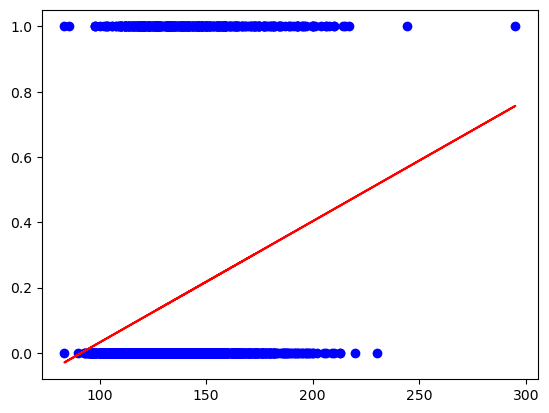

In [213]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, lr.predict(X_train), color='red')

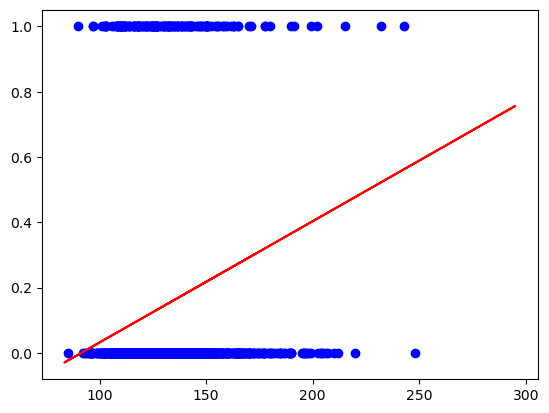

In [214]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, lr.predict(X_train), color='red')

In [215]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE: ', mean_absolute_error(Y_test, y_predict)) # MAE
print('MSE: ', mean_squared_error(Y_test, y_predict)) # MSE
print('RMSE: ', np.sqrt(mean_absolute_error(Y_test, y_predict))) #RMSE

MAE:  0.24572454070455366
MSE:  0.12323440500082271
RMSE:  0.4957061031544333


# LOGISTIC REGRESSION

In [217]:
X = df[['age', 'male', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP']]
Y = df['TenYearCHD']

import seaborn as sns
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
X = normalizer.fit_transform(X)

Y_train = np.asarray(Y_train)
Y_train

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [218]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, Y_train)

LogisticRegression()

In [219]:
Y_predict = reg.predict(X_test)
Y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [220]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)
cr = classification_report(Y_test, Y_predict)
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       931
           1       0.40      0.02      0.05       167

    accuracy                           0.85      1098
   macro avg       0.63      0.51      0.48      1098
weighted avg       0.78      0.85      0.78      1098

[[925   6]
 [163   4]]


In [221]:
from sklearn.metrics import accuracy_score
a_s = accuracy_score(Y_test, Y_predict)
a_s

0.8460837887067395

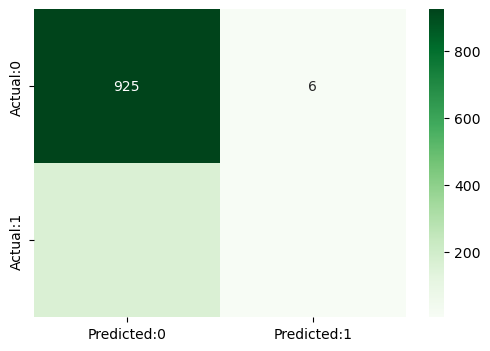

In [222]:
cm = pd.DataFrame(data = cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.show()

# DECISION TREE CLASSIFICATION

In [223]:
X = df[['age', 'male', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP']]
Y = df['TenYearCHD']

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [225]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)

DecisionTreeClassifier()

In [226]:
y_predict=dectree.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [227]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cr = classification_report(y_test, y_predict)
cm = confusion_matrix(y_test, y_predict)
a_s = accuracy_score(y_test, y_predict)
print(cr, cm, a_s)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       925
           1       0.24      0.25      0.25       173

    accuracy                           0.76      1098
   macro avg       0.55      0.55      0.55      1098
weighted avg       0.76      0.76      0.76      1098
 [[790 135]
 [130  43]] 0.7586520947176685


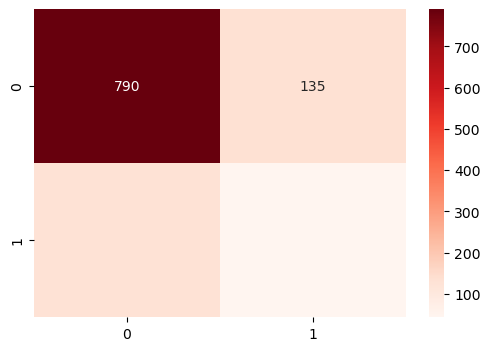

In [228]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.show()

# RANDOM FOREST CLASSIFICATION

In [229]:
from sklearn.ensemble import RandomForestClassifier
ranforest = RandomForestClassifier()
ranforest.fit(X_train, y_train)

RandomForestClassifier()

In [230]:
y_predict=ranforest.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [231]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cr = classification_report(y_test, y_predict)
cm = confusion_matrix(y_test, y_predict)
a_s = accuracy_score(y_test, y_predict)
print(cr, cm, a_s)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       925
           1       0.38      0.10      0.16       173

    accuracy                           0.83      1098
   macro avg       0.61      0.53      0.53      1098
weighted avg       0.78      0.83      0.79      1098
 [[897  28]
 [156  17]] 0.8324225865209471


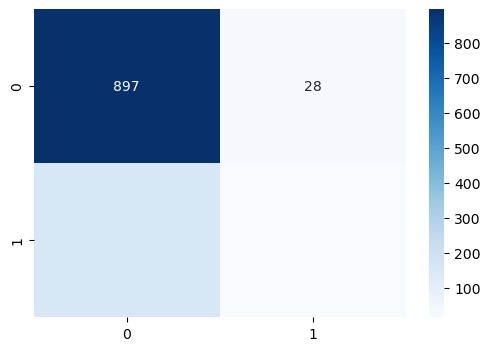

In [232]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()